#### Eda for NYC yellow taxi info before creating aws glue jobs for tranformations 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df= pd.read_parquet("DatosTaxi/yellow_tripdata_2025-01.parquet")
df2= pd.read_parquet("DatosTaxi/yellow_tripdata_2025-02.parquet")
df3= pd.read_parquet("DatosTaxi/yellow_tripdata_2025-03.parquet")
df4= pd.read_parquet("DatosTaxi/yellow_tripdata_2025-04.parquet")

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3475226 entries, 0 to 3475225
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [4]:
# tomamos una muestra aleatoria del 20% de los datos para facilitar el manejo
df = df.sample(frac=0.5)

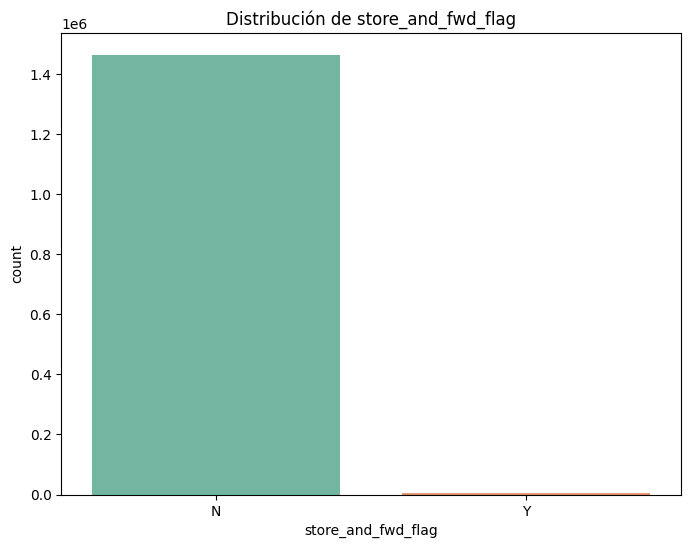

In [5]:
#grafica variable store_and_fwd_flag
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x = 'store_and_fwd_flag', palette = 'Set2')
plt.title('Distribución de store_and_fwd_flag')
plt.show()


Text(0.5, 0, 'Duración del viaje (minutos)')

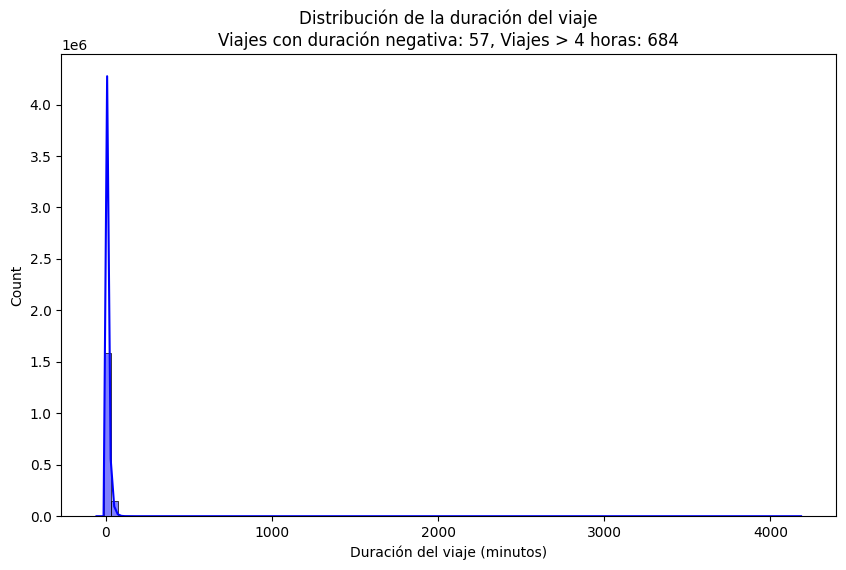

In [6]:
#graffica de duración del ciaje, calculada como la diferencia entre dropoff y pickup,
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60  # duración en minutos
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x = 'trip_duration', bins = 100, kde = True, color = 'blue')

# contador de viajes con duración negativa  y de viajes mayores a 4 horas 
negativos = (df['trip_duration'] < 0).sum()
largos = (df['trip_duration'] > 180).sum()
plt.title(f'Distribución de la duración del viaje\nViajes con duración negativa: {negativos}, Viajes > 4 horas: {largos}')
plt.xlabel('Duración del viaje (minutos)')


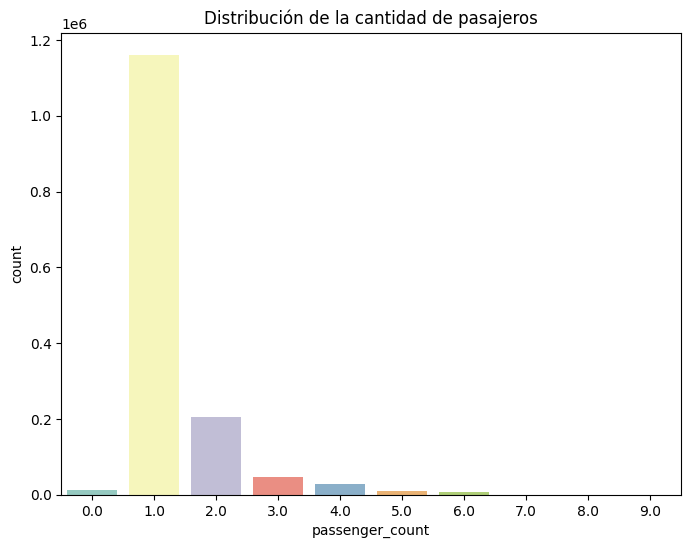

In [7]:
#grafica cantyidad pasajeros 
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x = 'passenger_count', palette = 'Set3')
plt.title('Distribución de la cantidad de pasajeros')
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1737613 entries, 798216 to 2712653
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

Porcentaje de viajes > 50 millas: 0.02%
Porcentaje de viajes > 100 millas: 0.00%
Porcentaje de viajes > 200 millas: 0.00%


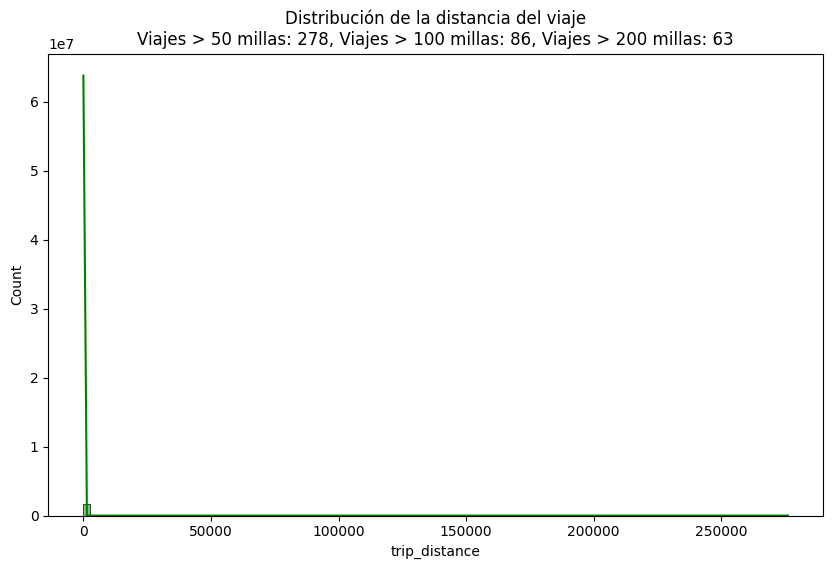

In [9]:
# grafica distancia
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x = 'trip_distance', bins = 100, kde = True, color = 'green')
plt.title('Distribución de la distancia del viaje')

# contador >50, > 100, > 200
largos_50 = (df['trip_distance'] > 50).sum()
largos_100 = (df['trip_distance'] > 100).sum()
largos_200 = (df['trip_distance'] > 200).sum()
plt.title(f'Distribución de la distancia del viaje\nViajes > 50 millas: {largos_50}, Viajes > 100 millas: {largos_100}, Viajes > 200 millas: {largos_200}')

#porcentaje de viajes >50, >100, >200
total_viajes = len(df)
porcentaje_50 = (largos_50 / total_viajes) * 100
porcentaje_100 = (largos_100 / total_viajes) * 100
porcentaje_200 = (largos_200 / total_viajes) * 100
print(f'Porcentaje de viajes > 50 millas: {porcentaje_50:.2f}%')
print(f'Porcentaje de viajes > 100 millas: {porcentaje_100:.2f}%')
print(f'Porcentaje de viajes > 200 millas: {porcentaje_200:.2f}%')

Mayor valor encontrado en PULocationID: 265


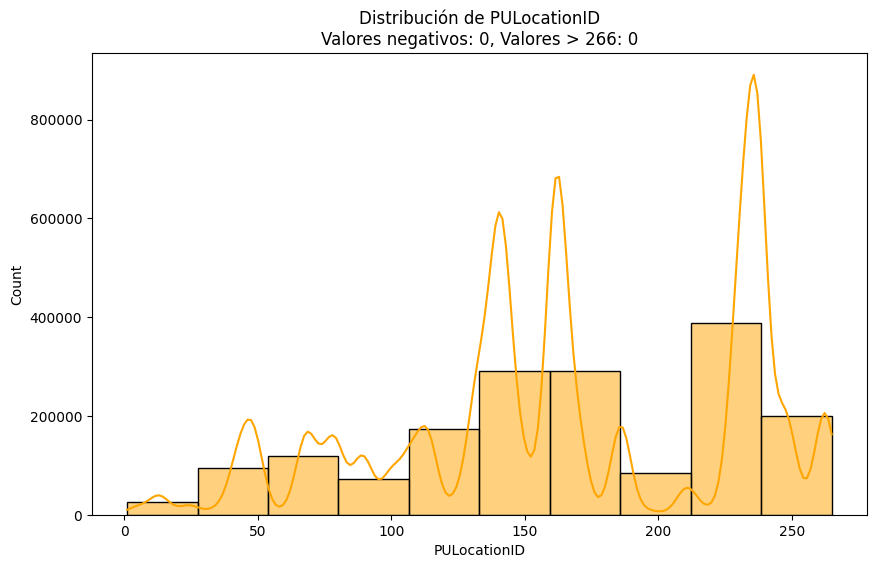

In [10]:
# grafica continua PULocationID y contador de negativos y mayores a 266
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x = 'PULocationID', bins = 10, kde = True, color = 'orange')
negativos_rate = (df['PULocationID'] < 0).sum()
mayores_266 = (df['PULocationID'] > 266).sum()
plt.title(f'Distribución de PULocationID\nValores negativos: {negativos_rate}, Valores > 266: {mayores_266}')
plt.xlabel('PULocationID')

#mayor encontrado en PULocationID
max_pulocation = df['PULocationID'].max()
print(f'Mayor valor encontrado en PULocationID: {max_pulocation}')


In [11]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,trip_duration
798216,2,2025-01-10 09:43:37,2025-01-10 09:54:55,1.0,1.67,1.0,N,107,100,2,...,0.0,0.5,0.00,0.00,1.0,16.15,2.5,0.0,0.75,11.300000
2411529,2,2025-01-26 16:58:02,2025-01-26 17:00:08,2.0,0.47,1.0,N,141,229,1,...,0.0,0.5,0.92,0.00,1.0,10.07,2.5,0.0,0.75,2.100000
1791598,2,2025-01-20 14:32:42,2025-01-20 14:53:55,1.0,1.70,1.0,N,107,186,1,...,0.0,0.5,2.00,0.00,1.0,25.85,2.5,0.0,0.75,21.216667
362950,2,2025-01-05 12:10:20,2025-01-05 12:36:23,1.0,17.32,1.0,N,230,138,1,...,5.0,0.5,16.26,6.94,1.0,97.55,2.5,0.0,0.75,26.050000
2743257,2,2025-01-30 10:32:59,2025-01-30 10:41:43,1.0,1.94,1.0,N,75,239,2,...,0.0,0.5,0.00,0.00,1.0,15.40,2.5,0.0,0.00,8.733333


KeyboardInterrupt: 

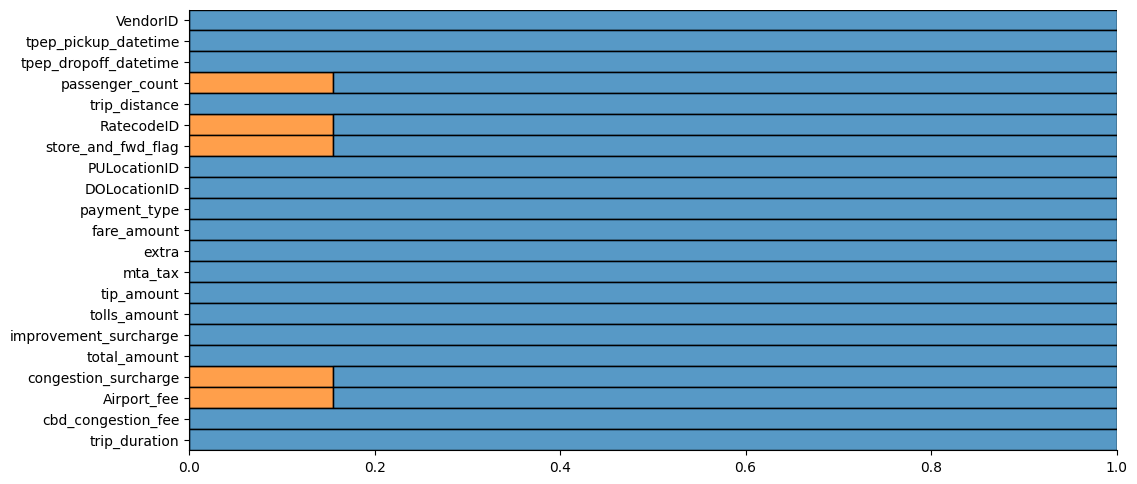

In [12]:
#Visualizar la proporción de datos nulos por variable
df.isnull().melt().pipe(lambda df: sns.displot(data = df, y = 'variable', hue = 'value', multiple = 'fill', aspect = 2))
plt.show()

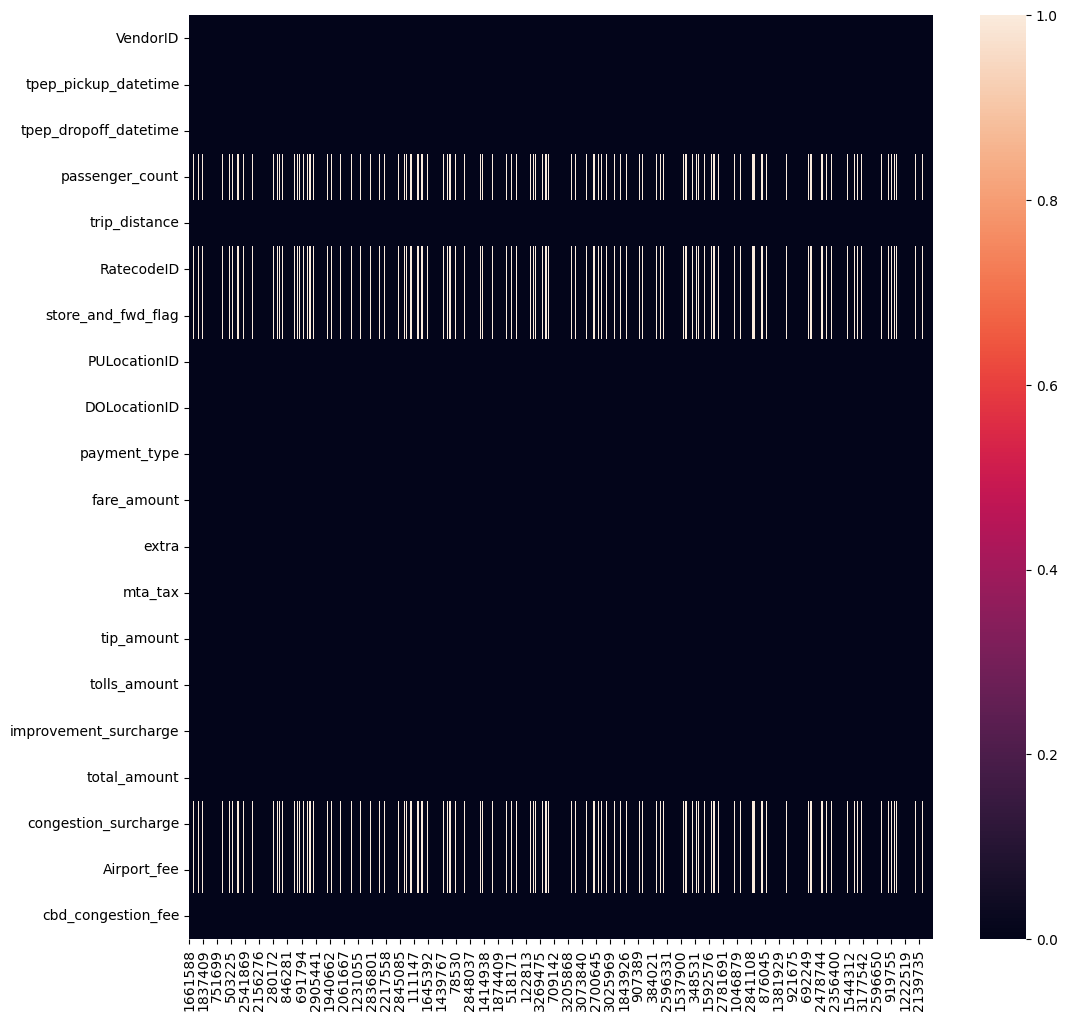

In [ ]:
plt.figure(figsize = (12, 12))
df.isnull().transpose().pipe(lambda df: sns.heatmap(data = df))
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1737613 entries, 798216 to 2712653
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

KeyboardInterrupt: 

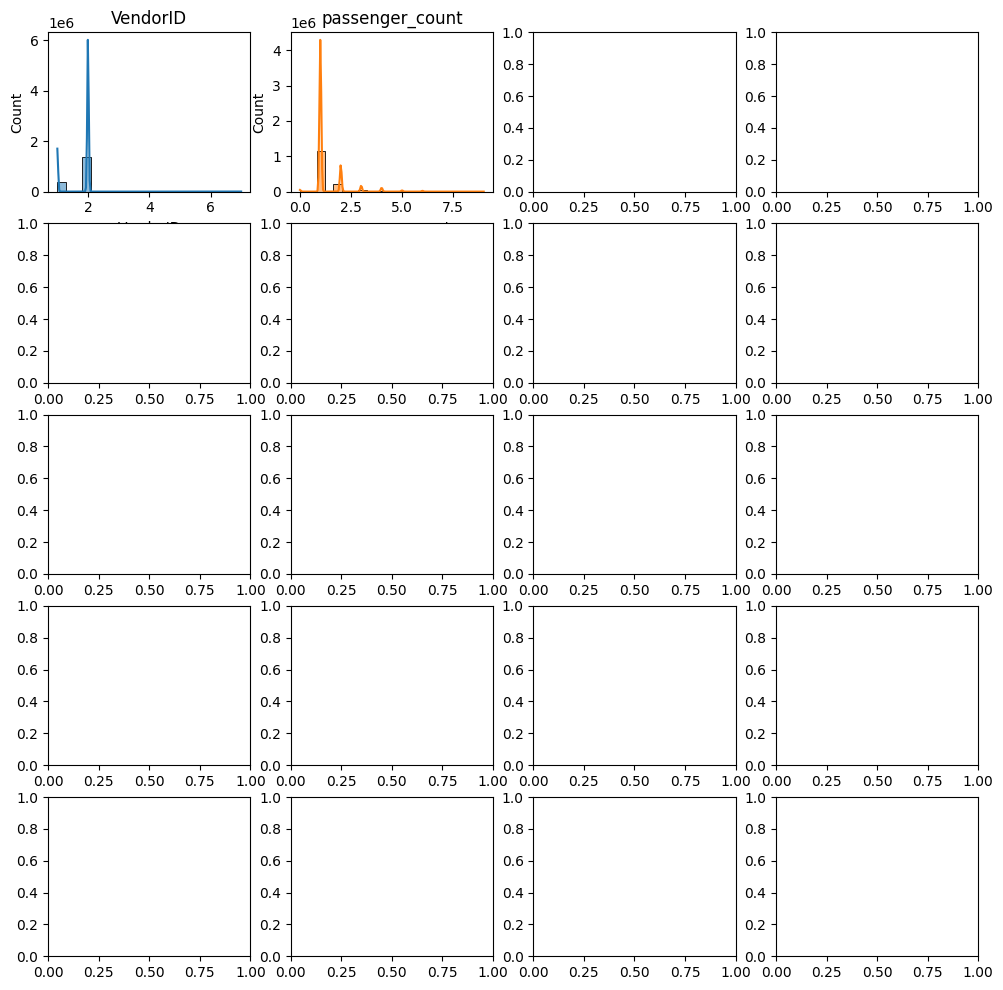

In [14]:
#Exploración univariada de los datos
##Para datos numéricos: histogramas de frecuencia
##Para datos categóricos: gráficos de torta

###HISTOGRAMAS DE FRECUENCIA
fig, ax = plt.subplots(5, 4, figsize = (12, 12))
ax = ax.flat
num_col = df.select_dtypes(include = ['int64', 'float64', 'int32']).columns
for i, col in enumerate(num_col):
    sns.histplot(data = df, x = col, 
                kde = True, color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'], ax = ax[i])
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)  
fig.suptitle('Comportamiento de Variables Numéricas')
plt.show()


In [ ]:

# rango de fechas pick up y dropoff
print("Rango de fechas tpep_pickup_datetime:", df['tpep_pickup_datetime'].min(), "a", df['tpep_pickup_datetime'].max())
print("Rango de fechas tpep_dropoff_datetime:", df['tpep_dropoff_datetime'].min(), "a", df['tpep_dropoff_datetime'].max())

# rango de fechas pick up y dropoff
print("Rango de fechas tpep_pickup_datetime:", df2['tpep_pickup_datetime'].min(), "a", df2['tpep_pickup_datetime'].max())
print("Rango de fechas tpep_dropoff_datetime:", df2['tpep_dropoff_datetime'].min(), "a", df2['tpep_dropoff_datetime'].max())

# rango de fechas pick up y dropoff
print("Rango de fechas tpep_pickup_datetime:", df3['tpep_pickup_datetime'].min(), "a", df3['tpep_pickup_datetime'].max())
print("Rango de fechas tpep_dropoff_datetime:", df3['tpep_dropoff_datetime'].min(), "a", df3['tpep_dropoff_datetime'].max()) 
# rango de fechas pick up y dropoff
print("Rango de fechas tpep_pickup_datetime:", df4['tpep_pickup_datetime'].min(), "a", df4['tpep_pickup_datetime'].max())
print("Rango de fechas tpep_dropoff_datetime:", df4['tpep_dropoff_datetime'].min(), "a", df4['tpep_dropoff_datetime'].max()) 




Rango de fechas tpep_pickup_datetime: 2024-12-31 20:47:55 a 2025-02-01 00:00:44
Rango de fechas tpep_dropoff_datetime: 2024-12-18 07:52:40 a 2025-02-01 23:44:11
Rango de fechas tpep_pickup_datetime: 2024-12-31 20:47:55 a 2025-02-01 00:00:44
Rango de fechas tpep_dropoff_datetime: 2024-12-18 07:52:40 a 2025-02-01 23:44:11
Rango de fechas tpep_pickup_datetime: 2025-01-31 22:22:53 a 2025-03-01 00:06:32
Rango de fechas tpep_dropoff_datetime: 2025-01-31 22:30:00 a 2025-03-01 23:13:42
Rango de fechas tpep_pickup_datetime: 2007-12-05 18:45:00 a 2025-04-01 00:00:17
Rango de fechas tpep_dropoff_datetime: 2007-12-05 19:02:00 a 2025-04-03 14:07:50
Rango de fechas tpep_pickup_datetime: 2025-03-31 23:45:01 a 2025-05-01 00:48:13
Rango de fechas tpep_dropoff_datetime: 2025-03-31 23:54:54 a 2025-05-01 21:42:14


In [20]:
# viajes en df3 donde el ano es diff a 2025
viajes_diff_ano = df3[df3['tpep_pickup_datetime'].dt.year != 2025]
print("Número de viajes en df3 donde el año es diferente a 2025:", len(viajes_diff_ano))

Número de viajes en df3 donde el año es diferente a 2025: 2


In [21]:
viajes_diff_ano.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
230843,2,2009-01-01 00:19:34,2009-01-01 01:10:21,6.0,10.77,1.0,N,138,239,2,52.7,5.0,0.5,0.0,6.94,1.0,70.39,2.5,1.75,0.00
827675,2,2007-12-05 18:45:00,2007-12-05 19:02:00,1.0,3.00,1.0,N,142,234,2,17.0,1.0,0.5,0.0,0.00,1.0,22.75,2.5,0.00,0.75
